### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [6]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="llama-3.1-8b-instant")
llm_groq.invoke("Hey I am Kashyap and i like to play cricket")

AIMessage(content="Nice to meet you Kashyap. Cricket is an amazing sport, isn't it? What's your favorite aspect of playing cricket? Do you prefer batting, bowling, or fielding? Or do you have a favorite player or team that inspires you?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 47, 'total_tokens': 99, 'completion_time': 0.073125015, 'completion_tokens_details': None, 'prompt_time': 0.004942685, 'prompt_tokens_details': None, 'queue_time': 0.066751072, 'total_time': 0.0780677}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e2c608b1d6', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c8164-dbef-7b01-b5a7-c7b19318f688-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 47, 'output_tokens': 52, 'total_tokens': 99})

### We Will start With Creating Nodes

In [7]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

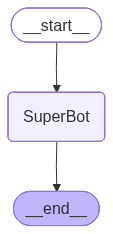

In [8]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [9]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is Kashyap And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Kashyap And I like cricket', additional_kwargs={}, response_metadata={}, id='e95c817b-3110-4382-89fc-b2b2fa1607a7'),
  AIMessage(content="Hello Kashyap, nice to meet you. Cricket is a fantastic sport, and I'm glad you enjoy it. Are you a fan of any particular team or player? Do you play cricket yourself or are you more of a spectator?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 47, 'total_tokens': 96, 'completion_time': 0.054774645, 'completion_tokens_details': None, 'prompt_time': 0.007852617, 'prompt_tokens_details': None, 'queue_time': 0.068155226, 'total_time': 0.062627262}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e2c608b1d6', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c8164-f119-7d70-aff5-91acdf210e6a-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 47, 'out

#### Streaming The responses

In [10]:
for event in graph_builder.stream({"messages":"Hello My name is Kashyap"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="Hello Kashyap, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 42, 'total_tokens': 70, 'completion_time': 0.029016902, 'completion_tokens_details': None, 'prompt_time': 0.003160852, 'prompt_tokens_details': None, 'queue_time': 0.067827486, 'total_time': 0.032177754}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_66c49b4aa6', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c8164-ff53-7793-924a-00de13a48785-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 42, 'output_tokens': 28, 'total_tokens': 70})]}}
